In [1]:
import pandas as pd
import epipi
import matplotlib.pyplot as plt
import arviz as az
import rpy2.robjects as robjects

In [2]:
# Data Preparation
omega = pd.read_csv('../EpiOS/omega.csv')['omega'].values
theta = pd.read_csv('../EpiOS/y_interpolated.csv')['y_interpolated'].values

## Use Pystan to generate inference

In [32]:
prior = []
for i in range(len(theta)):
    prior.append(epipi.NormalPrior(1000, 200))
prior.append(epipi.NormalPrior(0, 1))

In [3]:
controller = epipi.InferenceController(theta, omega)
fit, samples = controller.run()
df = az.summary(samples)
df

Building...



Building: found in cache, done.Messages from stanc:
Warning in '/tmp/httpstan_b6_1b4p9/model_q7i6zfmt.stan', line 35, column 28: Argument
    1700 suggests there may be parameters that are not unit scale; consider
    rescaling with a multiplier (see manual section 22.12).
Warning in '/tmp/httpstan_b6_1b4p9/model_q7i6zfmt.stan', line 35, column 22: Argument
    5000 suggests there may be parameters that are not unit scale; consider
    rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:   0% (1/8000)
Sampling:   0% (2/8000)
Sampling:   0% (3/8000)
Sampling:   0% (4/8000)
Sampling:   1% (103/8000)
Sampling:   3% (202/8000)
Sampling:   4% (301/8000)
Sampling:   5% (400/8000)
Sampling:   6% (500/8000)
Sampling:   8% (600/8000)
Sampling:   9% (700/8000)
Sampling:  10% (800/8000)
Sampling:  12% (1000/8000)
Sampling:  15% (1200/8000)
Sampling:  16% (1300/8000)
Sampling:  18% (1400/8000)
Sampling:  19% (1500/8000)
Sampling:  20% (1600/8000)
Sampling:  22% (1800/8

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
I[0],250.660,14.740,221.467,276.639,0.241,0.171,3915.0,2755.0,1.0
I[1],13.953,12.698,0.001,37.802,0.214,0.157,2883.0,2301.0,1.0
I[2],24.949,19.213,0.003,59.925,0.313,0.236,3088.0,1681.0,1.0
I[3],61.934,32.002,0.391,113.240,0.603,0.427,2473.0,1495.0,1.0
I[4],98.311,41.514,19.666,174.023,0.743,0.526,3022.0,1937.0,1.0
...,...,...,...,...,...,...,...,...,...
I[81],3.508,3.370,0.001,9.648,0.041,0.035,4268.0,2079.0,1.0
I[82],7.497,7.052,0.001,20.353,0.092,0.075,3755.0,1763.0,1.0
I[83],5028.510,1655.509,1946.047,8181.637,26.017,18.398,3910.0,1803.0,1.0
I[84],5047.064,1668.175,1958.985,8209.769,22.323,15.786,5285.0,1897.0,1.0


Mean R_hat is 1.0
Std R_hat is 0.0


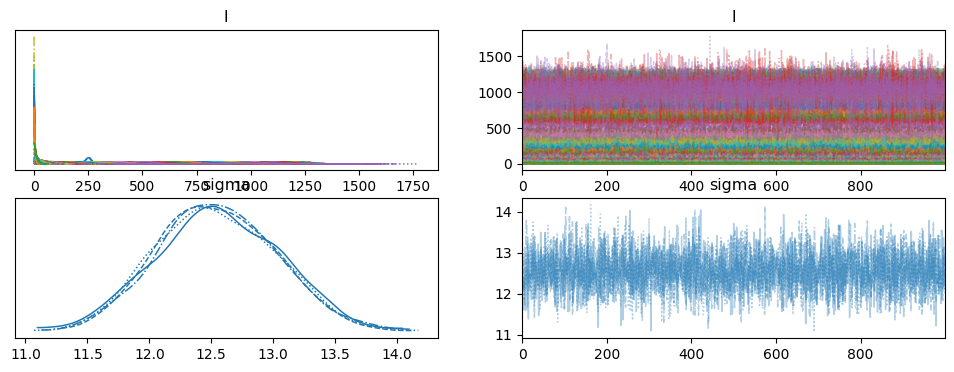

In [37]:
az.plot_trace(samples)
df = az.summary(samples)
predicted_mean = df['mean'].values
predicted_std = df['sd'].values
print('Mean R_hat is', df['r_hat'].values.mean())
print('Std R_hat is', df['r_hat'].values.std())

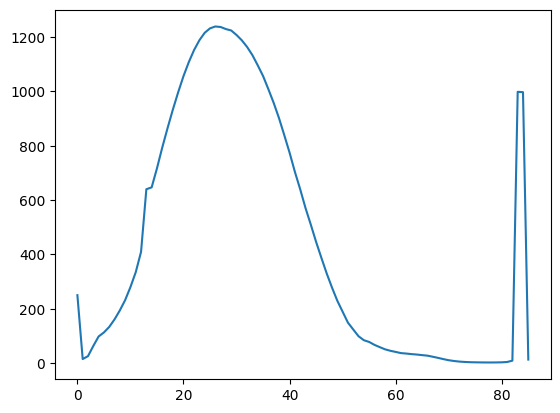

In [38]:
plt.plot(predicted_mean)
plt.show()

## Use PyStan with kernel at the end of time sample

In [ ]:
controller = epipi.InferenceKernelController(theta, omega, kernel=[])
fit, samples = controller.run()
df = az.summary(samples)
df

## Use RStan to implement optimization methods

In [4]:
controller = epipi.OptimizerController(theta, omega)
result = controller.run()

R[write to console]: Error in library(rstan) : there is no package called ‘rstan’



RRuntimeError: Error in library(rstan) : there is no package called ‘rstan’


In [4]:
robjects.r("""library(rstan)""")

R[write to console]: Error in library(rstan) : there is no package called ‘rstan’



RRuntimeError: Error in library(rstan) : there is no package called ‘rstan’


In [3]:
mkdir -p ~/R/x86_64-pc-linux-gnu-library/4.3.3
Rscript -e "install.packages('rstan', repos = 'https://cloud.r-project.org/', dependencies = TRUE, lib='~/R/x86_64-pc-linux-gnu-library/4.3.3')"
Sys.setenv(DOWNLOAD_STATIC_LIBV8 = 1) # only necessary for Linux without the nodejs library / headers

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: Warning in install.packages("rstan", repos = c("https://mc-stan.org/r-packages/",  :
R[write to console]: 
 
R[write to console]:  'lib = "/usr/local/lib/R/site-library"' is not writable

